In [7]:
import sys
sys.path.append( '../src')

import matplotlib.pyplot as plt
% matplotlib inline

import files as f
import pipeline as p

In [13]:
IMAGE_FILE = '../data/test2.tif'
SHAPEFILE = '../data/squares.shp'

In [ ]:
image, src, gt = f.open_image(IMAGE_FILE)

squares = p.find_squares(image)

p.squares_to_shapefile(squares, SHAPEFILE, gt)

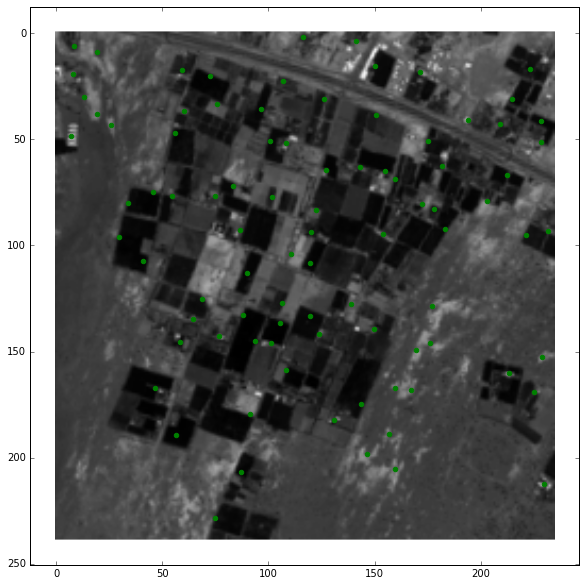

In [12]:
plt.figure(figsize=(15, 10))
plt.imshow(image, cmap='gray')

for b, centroid in squares:
    plt.scatter(centroid[0], centroid[1], color='green')

plt.show()